In [120]:
import pandas as pd  
import numpy as np
from pandas_datareader import data, wb
import datetime
import scipy.optimize as sco
from scipy import stats

import matplotlib.pyplot as plt

%matplotlib inline

In [182]:
# reading historical prices into a pandas dataframe df
ret_portfolio_df = pd.read_csv("RetirementPortfolio.csv")
ret_portfolio_df

INVESTMENT  Ticker              ASSET CLASS  \
0          American Century Mid Cap Value R6   AMDVX            Mid Cap Funds   
1                     Fidelity Mid Cap Index   FSMDX            Mid Cap Funds   
2   Fidelity Real Estate Index Institutional   FSRNX                Specialty   
3                   Fidelity Small Cap Index   FSSNX          Small Cap Funds   
4                         Fidelity 500 Index   FXAIX          Large Cap Funds   
5                     Fidelity US Bond Index   FXNAX                     Bond   
6   Victory Trivalent International Sm Cp R6   MSSIX      International Funds   
7   Great-West T. Rowe Price Mid Cap Gr Inst   MXYKX            Mid Cap Funds   
8                         PIMCO Income Instl   PIMIX                     Bond   
9                      AB Small Cap Growth I   QUAIX          Small Cap Funds   
10    American Funds EuroPacific Growth Fund   RERGX  Foreign Large Cap Funds   
11          T. Rowe Price Blue Chip Growth I   TBCIX          Large Cap Funds   
12     Undiscovered Mgrs Behavioral Value R6   UBVFX          Small Cap Funds   
13                Vanguard Equity-Income Adm   VEIRX          Large Cap Funds   
14        Vanguard FTSE Social Index Admiral   VFTAX          Large Cap Funds   
15     Vanguard Total Intl Stock Index Instl   VTSNX      International Funds   
16       Western Asset Core Bond Portfolio I  WATFX                      Bond   
17             Key Guaranteed Portfolio Fund     NaN                    Fixed   

       1 YR  5 YEAR 10 YR / INCEP GROSS EXP %  
0   -17.23%   1.89%         8.21%       0.63%  
1   -18.29%   1.86%         9.21%       0.03%  
2   -24.02%  -1.49%         5.41%       0.07%  
3   -23.87%  -0.07%         7.75%       0.03%  
4    -6.99%   6.72%        10.51%       0.02%  
5     9.23%   3.39%         3.87%       0.03%  
6   -18.16%   0.17%         6.49%       1.10%  
7   -12.79%   5.76%        11.07%       0.67%  
8    -3.16%   3.59%         7.34%       1.05%  
9    -9.69%   8.06%        12.91%       0.91%  
10  -14.74%   0.91%         3.97%       1.00%  
11   -2.70%  10.86%        13.93%       0.57%  
12  -35.97%  -3.26%         6.21%       0.86%  
13  -13.20%   4.55%         9.61%       0.18%  
14   -5.77%   7.14%        11.03%       0.14%  
15  -16.55%  -0.65%         2.09%       0.08%  
16    5.95%   3.52%         4.67%       0.53%  
17      NaN     NaN           NaN         NaN

In [122]:
tickers1 = ret_portfolio_df['Ticker']
tickers = [
    'AMDVX', 
    'FSMDX', 
    'FRESX', #instead of FSNRX
    'FSSNX', 
    'FXAIX', 
    'FXNAX',
    'MSSIX',
    'MXYKX', 
    'PIMIX',
    'QUAIX',
    'RERGX',
    'TBCIX', 
    'UBVFX',
    'VEIRX',
    'VFTNX',
    'VTPSX',
    'WATFX']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [123]:
tickers1

0      AMDVX
1      FSMDX
2      FSRNX
3      FSSNX
4      FXAIX
5      FXNAX
6      MSSIX
7      MXYKX
8      PIMIX
9      QUAIX
10     RERGX
11     TBCIX
12     UBVFX
13     VEIRX
14     VFTAX
15     VTSNX
16    WATFX 
17       NaN
Name: Ticker, dtype: object

In [124]:
# The index should consist of dates or timestamps, and each column should represent the time series of prices for an asset. A dataset of real-life stock prices has been included in the tests folder of the GitHub repo.
df

AMDVX      FSMDX      FRESX  FSSNX      FXAIX  FXNAX  MSSIX  \
Date                                                                      
2010-01-04    NaN        NaN  14.241749    NaN        NaN    NaN    NaN   
2010-01-05    NaN        NaN  14.263033    NaN        NaN    NaN    NaN   
2010-01-06    NaN        NaN  14.234648    NaN        NaN    NaN    NaN   
2010-01-07    NaN        NaN  14.433334    NaN        NaN    NaN    NaN   
2010-01-08    NaN        NaN  14.270127    NaN        NaN    NaN    NaN   
...           ...        ...        ...    ...        ...    ...    ...   
2020-04-06  12.49  17.510000  33.990002  14.41  92.849998  12.27  10.35   
2020-04-07  12.61  17.660000  34.259998  14.42  92.699997  12.29  10.50   
2020-04-08  13.15  18.459999  36.360001  15.09  95.339996  12.29  10.75   
2020-04-09  13.52  18.980000  38.549999  15.78  96.739998  12.36  10.99   
2020-04-13  13.17  18.540001  36.790001  15.35  95.760002  12.38  10.92   

            MXYKX      PIMIX      QUAIX      RERGX       TBCIX      UBVFX  \
Date                                                                        
2010-01-04    NaN   5.161159  13.110294  29.661915         NaN        NaN   
2010-01-05    NaN   5.187249  13.141411  29.571320         NaN        NaN   
2010-01-06    NaN   5.192468  13.203644  29.729858         NaN        NaN   
2010-01-07    NaN   5.208125  13.198458  29.473181         NaN        NaN   
2010-01-08    NaN   5.213341  13.234760  29.827999         NaN        NaN   
...           ...        ...        ...        ...         ...        ...   
2020-04-06   6.55  10.920000  48.139999  43.180000  110.650002  36.520000   
2020-04-07   6.59  10.990000  47.869999  43.740002  110.260002  36.980000   
2020-04-08   6.82  11.010000  49.959999  44.330002  113.620003  39.090000   
2020-04-09   6.94  11.150000  51.060001  45.020000  114.120003  41.419998   
2020-04-13   6.94  11.150000  50.310001  44.660000  114.430000  39.750000   

                VEIRX      VFTNX      VTPSX      WATFX  
Date                                                    
2010-01-04  23.475222   5.772134        NaN   7.914851  
2010-01-05  23.469162   5.797749        NaN   7.885368  
2010-01-06  23.475222   5.789211        NaN   7.907473  
2010-01-07  23.572020   5.831903        NaN   7.929588  
2010-01-08  23.632528   5.848980        NaN   7.944325  
...               ...        ...        ...        ...  
2020-04-06  62.639999  17.969999  91.220001  12.900000  
2020-04-07  62.570000  17.940001  91.889999  12.950000  
2020-04-08  64.779999  18.530001  93.220001  12.990000  
2020-04-09  66.059998  18.799999  94.330002  13.180000  
2020-04-13  64.870003  18.660000  94.010002  13.200000  

[2586 rows x 17 columns]

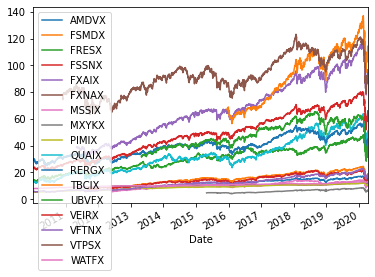

In [125]:
df.plot()

Text(0, 0.5, 'price in $')

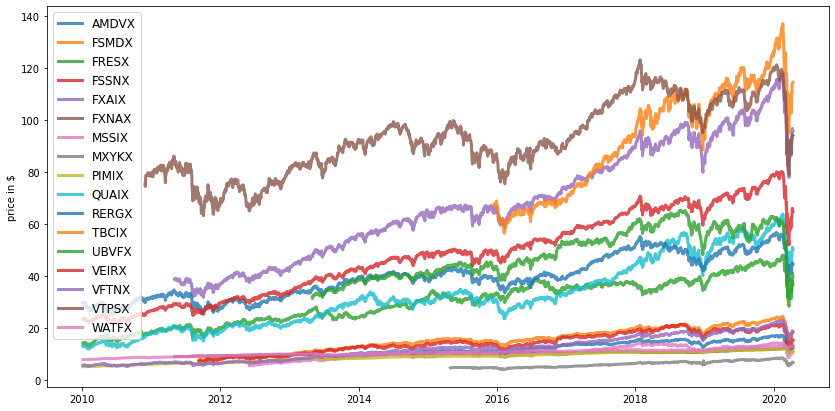

In [126]:
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

In [127]:
# mu will then be a pandas series of estimated expected returns for each asset, and S will be the estimated covariance matrix (part of it is shown below)
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df) #retruns.mean() * 252
S = CovarianceShrinkage(df).ledoit_wolf() #Get the sample covariance matrix

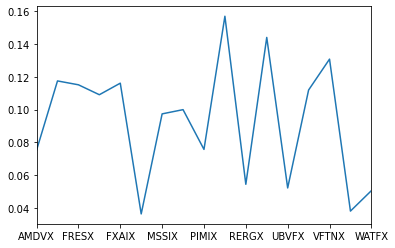

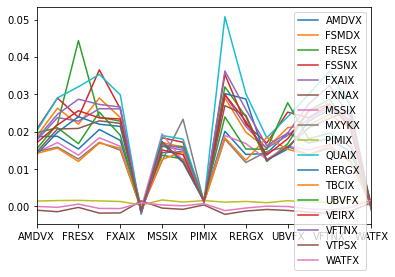

In [128]:
mu.plot()
S.plot()

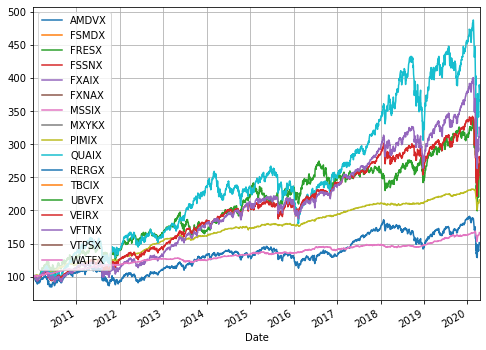

In [129]:
(df / df.ix[0] * 100).plot(figsize=(8, 6), grid=True)

In [130]:
# Efficient Frontier Optimisation
# find the portfolio that maximises the Sharpe ratio
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights

In [183]:
# truncates tiny weights to zero and rounds the rest
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
df11 = pd.read_csv("weights.csv",header=None)
df11.columns=["Ticker","Weights"]
df21 = pd.merge(ret_portfolio_df,df11,on='Ticker')
df21['Weights'] = df21['Weights'] * 100
df21.to_csv("weights_cla_eff.csv")
df21

INVESTMENT Ticker              ASSET CLASS  \
0          American Century Mid Cap Value R6  AMDVX            Mid Cap Funds   
1                     Fidelity Mid Cap Index  FSMDX            Mid Cap Funds   
2                   Fidelity Small Cap Index  FSSNX          Small Cap Funds   
3                         Fidelity 500 Index  FXAIX          Large Cap Funds   
4                     Fidelity US Bond Index  FXNAX                     Bond   
5   Victory Trivalent International Sm Cp R6  MSSIX      International Funds   
6   Great-West T. Rowe Price Mid Cap Gr Inst  MXYKX            Mid Cap Funds   
7                         PIMCO Income Instl  PIMIX                     Bond   
8                      AB Small Cap Growth I  QUAIX          Small Cap Funds   
9     American Funds EuroPacific Growth Fund  RERGX  Foreign Large Cap Funds   
10          T. Rowe Price Blue Chip Growth I  TBCIX          Large Cap Funds   
11     Undiscovered Mgrs Behavioral Value R6  UBVFX          Small Cap Funds   
12                Vanguard Equity-Income Adm  VEIRX          Large Cap Funds   

       1 YR  5 YEAR 10 YR / INCEP GROSS EXP %  Weights  
0   -17.23%   1.89%         8.21%       0.63%    0.000  
1   -18.29%   1.86%         9.21%       0.03%    0.000  
2   -23.87%  -0.07%         7.75%       0.03%    0.000  
3    -6.99%   6.72%        10.51%       0.02%    0.000  
4     9.23%   3.39%         3.87%       0.03%   10.147  
5   -18.16%   0.17%         6.49%       1.10%    0.000  
6   -12.79%   5.76%        11.07%       0.67%    0.000  
7    -3.16%   3.59%         7.34%       1.05%   70.734  
8    -9.69%   8.06%        12.91%       0.91%    1.323  
9   -14.74%   0.91%         3.97%       1.00%    0.000  
10   -2.70%  10.86%        13.93%       0.57%   11.314  
11  -35.97%  -3.26%         6.21%       0.86%    0.000  
12  -13.20%   4.55%         9.61%       0.18%    0.000

In [132]:
# we want to know the expected performance of the portfolio with optimal weights w
ef.portfolio_performance(verbose=True)

Expected annual return: 7.9%
Annual volatility: 3.8%
Sharpe Ratio: 1.57


(0.07888601530372383, 0.03758817134891825, 1.5666102710106566)

In [133]:
#ef = EfficientFrontier(mu, S)
#ef.add_objective(objective_functions.L2_reg, gamma=0.1)
#w = ef.max_sharpe()
#print(ef.clean_weights())

In [134]:
# Post-processing weights
# convert these weights into an actual allocation, telling you how many shares of each asset you should purchase. 
# These are the quantitites of shares that should be bought to have a $20,000 portfolio:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=308000)
allocation, leftover = da.lp_portfolio()
print(allocation,"\n",ret_portfolio_df)

{'FXNAX': 2525.0, 'MXYKX': 1.0, 'PIMIX': 19539.0, 'QUAIX': 81.0, 'TBCIX': 304.0, 'WATFX': 1513.0} 
                                   INVESTMENT  Ticker          ASSET CLASS  \
0          American Century Mid Cap Value R6   AMDVX        Mid Cap Funds   
1                     Fidelity Mid Cap Index   FSMDX        Mid Cap Funds   
2   Fidelity Real Estate Index Institutional   FSRNX            Specialty   
3                   Fidelity Small Cap Index   FSSNX      Small Cap Funds   
4                         Fidelity 500 Index   FXAIX      Large Cap Funds   
5                     Fidelity US Bond Index   FXNAX                 Bond   
6   Victory Trivalent International Sm Cp R6   MSSIX  International Funds   
7   Great-West T. Rowe Price Mid Cap Gr Inst   MXYKX        Mid Cap Funds   
8                         PIMCO Income Instl   PIMIX                 Bond   
9                      AB Small Cap Growth I   QUAIX      Small Cap Funds   
10    American Funds EuroPacific Growth Fund   RERGX 

In [135]:
#find the efficient frontier for a number of desired portfolios. The following is for a long/short market-neutral portfolio limited to the six highest stocks by market cap, with a set target return.
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
ef.efficient_return(target_return=0.15, market_neutral=True)

{'AMDVX': -0.559602877798936,
 'FSMDX': 0.2479349246776468,
 'FRESX': 0.0473340193565542,
 'FSSNX': -0.0538411876767854,
 'FXAIX': 0.1101346142183171,
 'FXNAX': -0.9170394795804918,
 'MSSIX': 0.4730073530211336,
 'MXYKX': -0.0590011083357334,
 'PIMIX': 1.0,
 'QUAIX': 0.1908501702708031,
 'RERGX': -0.2905149291262788,
 'TBCIX': 0.401737472220109,
 'UBVFX': -0.2747796839345148,
 'VEIRX': 0.4436147820472746,
 'VFTNX': -0.104096417475551,
 'VTPSX': -0.6059233014599306,
 'WATFX': -0.0498143504236163}

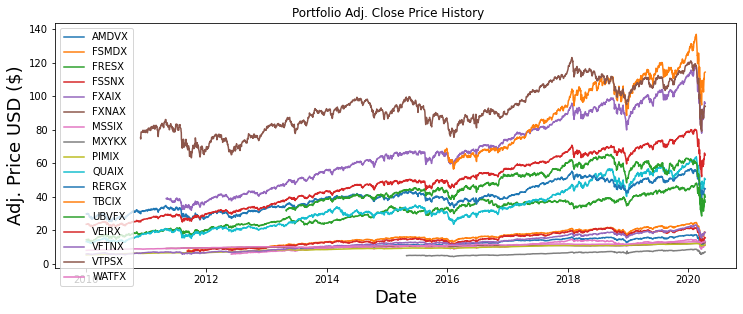

In [136]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
#my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in df.columns.values:
  plt.plot( df[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [137]:
# Create the title 'Portfolio Adj Close Price History
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() 
print(weights,"\n",ret_portfolio_df)
print(ef)

{'AMDVX': 0.0, 'FSMDX': 0.0, 'FRESX': 0.0, 'FSSNX': 0.0, 'FXAIX': 0.0, 'FXNAX': 0.101470847738707, 'MSSIX': 0.0, 'MXYKX': 0.0, 'PIMIX': 0.7073422499416059, 'QUAIX': 0.0132280444505614, 'RERGX': 0.0, 'TBCIX': 0.1131370881220262, 'UBVFX': 0.0, 'VEIRX': 0.0, 'VFTNX': 0.0, 'VTPSX': 0.0, 'WATFX': 0.0648217697470995} 
                                   INVESTMENT  Ticker          ASSET CLASS  \
0          American Century Mid Cap Value R6   AMDVX        Mid Cap Funds   
1                     Fidelity Mid Cap Index   FSMDX        Mid Cap Funds   
2   Fidelity Real Estate Index Institutional   FSRNX            Specialty   
3                   Fidelity Small Cap Index   FSSNX      Small Cap Funds   
4                         Fidelity 500 Index   FXAIX      Large Cap Funds   
5                     Fidelity US Bond Index   FXNAX                 Bond   
6   Victory Trivalent International Sm Cp R6   MSSIX  International Funds   
7   Great-West T. Rowe Price Mid Cap Gr Inst   MXYKX        Mid Cap F

In [138]:
from pprint import pprint
pprint(vars(ef))

{'_additional_constraints_raw': [],
 '_additional_objectives': [],
 '_constraints': [Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, NONNEGATIVE, ())),
                  Equality(Expression(AFFINE, UNKNOWN, ()), Variable(())),
                  Inequality(Constant(CONSTANT, ZERO, ())),
                  Inequality(Expression(AFFINE, ZERO, (17,))),
                  Inequality(Variable((17,)))],
 '_lower_bounds': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '_objective': Expression(CONVEX, NONNEGATIVE, (1, 1)),
 '_upper_bounds': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 '_w': Variable((17,)),
 'cov_matrix': array([[ 1.87140665e-02,  1.87972012e-02,  1.53954879e-02,
         2.06209225e-02,  1.76920874e-02, -9.93650469e-04,
         1.44209387e-02,  1.46859452e-02,  1.45686742e-03,
         2.01297163e-02,  1.39331119e-02,  1.41977092e-02,
         1.97246265e-02,  1.70077076e-02,  1.81653682e-02,
         1.45907875e-02,  1.27387455e-05],


In [139]:
#ploting efficient frontier
import plotly as py
import plotly.express as px

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *
import plotly.graph_objects as go

In [140]:
#fig = Figure([Scatter(x=df.index, y=df.columns.values)])
for c in df.columns.values:
  fig = Figure([Scatter(x=df.index,y=df[c])])
fig.show()

Text(0.5, 1.0, 'Mean and standard deviation of returns of randomly generated portfolios')

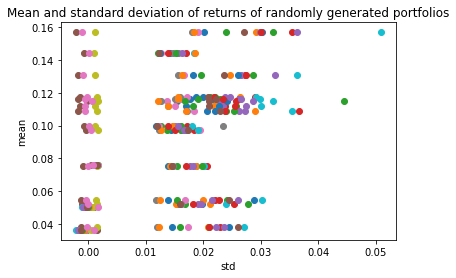

In [141]:
plt.plot(S, mu, 'o')  
plt.xlabel('std')  
plt.ylabel('mean')  
plt.title('Mean and standard deviation of returns of randomly generated portfolios')  

In [142]:
px.scatter_matrix(df)

In [143]:
df.columns.values


array(['AMDVX', 'FSMDX', 'FRESX', 'FSSNX', 'FXAIX', 'FXNAX', 'MSSIX',
       'MXYKX', 'PIMIX', 'QUAIX', 'RERGX', 'TBCIX', 'UBVFX', 'VEIRX',
       'VFTNX', 'VTPSX', 'WATFX'], dtype=object)

In [144]:
# https://pyportfolioopt.readthedocs.io/en/latest/OtherOptimisers.html#cla
import pypfopt.cla

efc = pypfopt.cla.CLA(mu, S)
weights = efc.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
weights

{'AMDVX': 0.0,
 'FSMDX': 0.0,
 'FRESX': 0.0,
 'FSSNX': 0.0,
 'FXAIX': 0.0,
 'FXNAX': 0.23060552556370625,
 'MSSIX': 0.0,
 'MXYKX': 0.0,
 'PIMIX': 0.5881184446462508,
 'QUAIX': 0.01620427981490135,
 'RERGX': 0.0,
 'TBCIX': 0.08350921456236089,
 'UBVFX': 0.0,
 'VEIRX': 0.0,
 'VFTNX': 2.8119637704093513e-18,
 'VTPSX': 0.0,
 'WATFX': 0.08156253541278059}

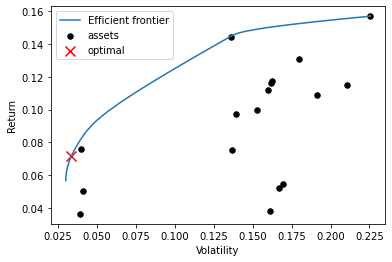

In [145]:
 #computes the entire efficient frontier and plot the efficient frontier.
 efc.plot_efficient_frontier()

In [146]:
#calculates the expected return, volatility and Sharpe ratio for the optimised portfolio.
efc.portfolio_performance(verbose=True)

Expected annual return: 7.2%
Annual volatility: 3.4%
Sharpe Ratio: 1.54


(0.07160056294831146, 0.03352204796793751, 1.5393022227539714)

In [147]:
#rounds the weights and clips near-zeros
clean_weights=efc.clean_weights() 
clean_weights

{'AMDVX': 0.0,
 'FSMDX': 0.0,
 'FRESX': 0.0,
 'FSSNX': 0.0,
 'FXAIX': 0.0,
 'FXNAX': 0.23061,
 'MSSIX': 0.0,
 'MXYKX': 0.0,
 'PIMIX': 0.58812,
 'QUAIX': 0.0162,
 'RERGX': 0.0,
 'TBCIX': 0.08351,
 'UBVFX': 0.0,
 'VEIRX': 0.0,
 'VFTNX': 0.0,
 'VTPSX': 0.0,
 'WATFX': 0.08156}

In [184]:
#saves the weights to csv, json, or txt
efc.save_weights_to_file("weights_cla.csv")

df1 = pd.read_csv("weights_cla.csv",header=None)
df1.columns=["Ticker","Weights_cla"]
df1

Ticker  Weights_cla
0   AMDVX      0.00000
1   FSMDX      0.00000
2   FRESX      0.00000
3   FSSNX      0.00000
4   FXAIX      0.00000
5   FXNAX      0.23061
6   MSSIX      0.00000
7   MXYKX      0.00000
8   PIMIX      0.58812
9   QUAIX      0.01620
10  RERGX      0.00000
11  TBCIX      0.08351
12  UBVFX      0.00000
13  VEIRX      0.00000
14  VFTNX      0.00000
15  VTPSX      0.00000
16  WATFX      0.08156

In [185]:
df2 = pd.merge(df21,df1,on='Ticker')
df2['Weights_cla'] = df2['Weights_cla'] * 100
df2.to_csv("weights_cla_eff.csv")
df2.sort_values(by=['ASSET CLASS','Ticker'])

INVESTMENT Ticker              ASSET CLASS  \
4                     Fidelity US Bond Index  FXNAX                     Bond   
7                         PIMCO Income Instl  PIMIX                     Bond   
9     American Funds EuroPacific Growth Fund  RERGX  Foreign Large Cap Funds   
5   Victory Trivalent International Sm Cp R6  MSSIX      International Funds   
3                         Fidelity 500 Index  FXAIX          Large Cap Funds   
10          T. Rowe Price Blue Chip Growth I  TBCIX          Large Cap Funds   
12                Vanguard Equity-Income Adm  VEIRX          Large Cap Funds   
0          American Century Mid Cap Value R6  AMDVX            Mid Cap Funds   
1                     Fidelity Mid Cap Index  FSMDX            Mid Cap Funds   
6   Great-West T. Rowe Price Mid Cap Gr Inst  MXYKX            Mid Cap Funds   
2                   Fidelity Small Cap Index  FSSNX          Small Cap Funds   
8                      AB Small Cap Growth I  QUAIX          Small Cap Funds   
11     Undiscovered Mgrs Behavioral Value R6  UBVFX          Small Cap Funds   

       1 YR  5 YEAR 10 YR / INCEP GROSS EXP %  Weights  Weights_cla  
4     9.23%   3.39%         3.87%       0.03%   10.147       23.061  
7    -3.16%   3.59%         7.34%       1.05%   70.734       58.812  
9   -14.74%   0.91%         3.97%       1.00%    0.000        0.000  
5   -18.16%   0.17%         6.49%       1.10%    0.000        0.000  
3    -6.99%   6.72%        10.51%       0.02%    0.000        0.000  
10   -2.70%  10.86%        13.93%       0.57%   11.314        8.351  
12  -13.20%   4.55%         9.61%       0.18%    0.000        0.000  
0   -17.23%   1.89%         8.21%       0.63%    0.000        0.000  
1   -18.29%   1.86%         9.21%       0.03%    0.000        0.000  
6   -12.79%   5.76%        11.07%       0.67%    0.000        0.000  
2   -23.87%  -0.07%         7.75%       0.03%    0.000        0.000  
8    -9.69%   8.06%        12.91%       0.91%    1.323        1.620  
11  -35.97%  -3.26%         6.21%       0.86%    0.000        0.000